# Limpeza de Dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados_exp=pd.read_csv('./Base de Dados/IBGE_SIDRA_ExpVidaSexo_2016.csv')

In [3]:
dados_exp['REGIAO']='OK'

In [4]:
norte=['Amazonas','Acre','Rondônia','Roraima','Pará','Amapá','Tocantins']
nordeste=['Maranhão','Ceará','Piauí','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia']
centro_oeste=['Mato Grosso','Mato Grosso do Sul','Goiás','Distrito Federal']
sudeste=['Minas Gerais','São Paulo','Rio de Janeiro','Espírito Santo']
sul=['Paraná','Santa Catarina','Rio Grande do Sul']
for i in range(1,len(dados_exp)):
    if dados_exp.iloc[i,6] in norte:
        dados_exp.iloc[i,13]='Norte'
    elif dados_exp.iloc[i,6] in nordeste:
        dados_exp.iloc[i,13]='Nordeste'
    elif dados_exp.iloc[i,6] in centro_oeste:
        dados_exp.iloc[i,13]='Centro-Oeste'
    elif dados_exp.iloc[i,6] in sudeste:
        dados_exp.iloc[i,13]='Sudeste'
    elif dados_exp.iloc[i,6] in sul:
        dados_exp.iloc[i,13]='Sul'

In [5]:
dados_exp

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,REGIAO
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Variável (Código),Variável,Sexo (Código),Sexo,Ano (Código),Ano,OK
1,3,Unidade da Federação,1622,Anos,71.3,11,Rondônia,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Norte
2,3,Unidade da Federação,1622,Anos,68.3,11,Rondônia,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Norte
3,3,Unidade da Federação,1622,Anos,75.0,11,Rondônia,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Norte
4,3,Unidade da Federação,1622,Anos,73.9,12,Acre,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,3,Unidade da Federação,1622,Anos,71.1,52,Goiás,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Centro-Oeste
78,3,Unidade da Federação,1622,Anos,77.5,52,Goiás,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Centro-Oeste
79,3,Unidade da Federação,1622,Anos,78.1,53,Distrito Federal,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Centro-Oeste
80,3,Unidade da Federação,1622,Anos,74.4,53,Distrito Federal,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Centro-Oeste


In [6]:
expec_norte=[]
expec_nordeste=[]
expec_centro=[]
expec_sudeste=[]
expec_sul=[]
for i in range(1,len(dados_exp)):
    if dados_exp.iloc[i,10]=='Total' and dados_exp.iloc[i,13]=='Norte':
        quero=dados_exp.iloc[i,4]
        expec_norte.append(float(quero))
    elif dados_exp.iloc[i,10]=='Total' and dados_exp.iloc[i,13]=='Nordeste':
        quero=dados_exp.iloc[i,4]
        expec_nordeste.append(float(quero))
    elif dados_exp.iloc[i,10]=='Total' and dados_exp.iloc[i,13]=='Centro-Oeste':
        quero=dados_exp.iloc[i,4]
        expec_centro.append(float(quero))
    elif dados_exp.iloc[i,10]=='Total' and dados_exp.iloc[i,13]=='Sudeste':
        quero=dados_exp.iloc[i,4]
        expec_sudeste.append(float(quero))
    elif dados_exp.iloc[i,10]=='Total' and dados_exp.iloc[i,13]=='Sul':
        quero=dados_exp.iloc[i,4]
        expec_sul.append(float(quero))

In [7]:
med_norte=np.mean(expec_norte)
med_nordeste=np.mean(expec_nordeste)
med_centro=np.mean(expec_centro)
med_nordeste=np.mean(expec_nordeste)
med_sul=np.mean(expec_sul)

In [8]:
print(f'Expectativa de vida média região Norte: {med_norte:.2f}')
print(f'Expectativa de vida média região Nordeste: {med_nordeste:.2f}')
print(f'Expectativa de vida média região Centro-Oeste: {med_centro:.2f}')
print(f'Expectativa de vida média região Sudeste: {med_nordeste:.2f}')
print(f'Expectativa de vida média região Sul: {med_sul:.2f}')

Expectativa de vida média região Norte: 72.57
Expectativa de vida média região Nordeste: 72.90
Expectativa de vida média região Centro-Oeste: 75.50
Expectativa de vida média região Sudeste: 72.90
Expectativa de vida média região Sul: 78.00


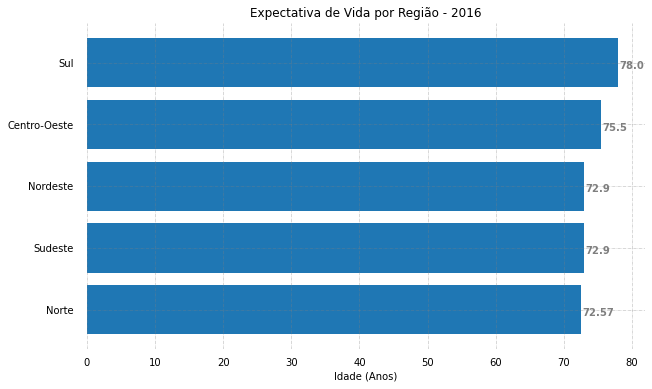

In [9]:
fig, ax = plt.subplots(figsize =(10, 6))
medias=[78,75.5,72.9,72.9,72.57]
labels=['Sul','Centro-Oeste','Nordeste','Sudeste','Norte']
ax.barh(labels, medias)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Expectativa de Vida por Região - 2016',
             loc ='center')
plt.xlabel('Idade (Anos)')
plt.show()

# Região Sul

In [10]:
dados_exp[dados_exp['REGIAO']=='Sul']

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,REGIAO
61,3,Unidade da Federação,1622,Anos,77.1,41,Paraná,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Sul
62,3,Unidade da Federação,1622,Anos,73.7,41,Paraná,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Sul
63,3,Unidade da Federação,1622,Anos,80.5,41,Paraná,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Sul
64,3,Unidade da Federação,1622,Anos,79.1,42,Santa Catarina,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Sul
65,3,Unidade da Federação,1622,Anos,75.8,42,Santa Catarina,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Sul
66,3,Unidade da Federação,1622,Anos,82.4,42,Santa Catarina,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Sul
67,3,Unidade da Federação,1622,Anos,77.8,43,Rio Grande do Sul,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Sul
68,3,Unidade da Federação,1622,Anos,74.3,43,Rio Grande do Sul,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Sul
69,3,Unidade da Federação,1622,Anos,81.1,43,Rio Grande do Sul,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Sul


In [11]:
estados_sul=['Santa Catarina','Rio Grande do Sul','Paraná']
expec_h=[75.8,74.3,73.7]
expec_m=[82.4,81.1,80.5]

## Homens

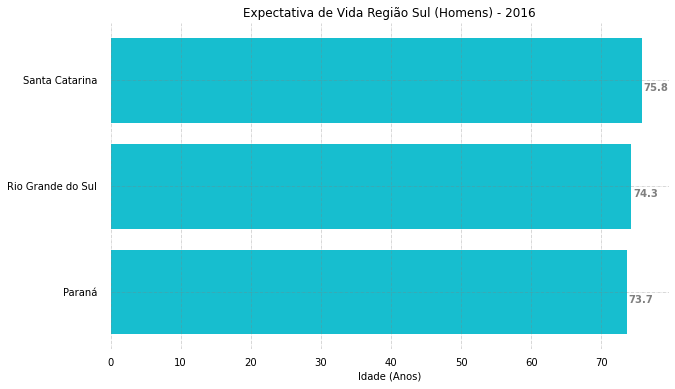

In [12]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(estados_sul, expec_h, color='tab:cyan')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Expectativa de Vida Região Sul (Homens) - 2016',
             loc ='center')
plt.xlabel('Idade (Anos)')
plt.show()

## Mulheres

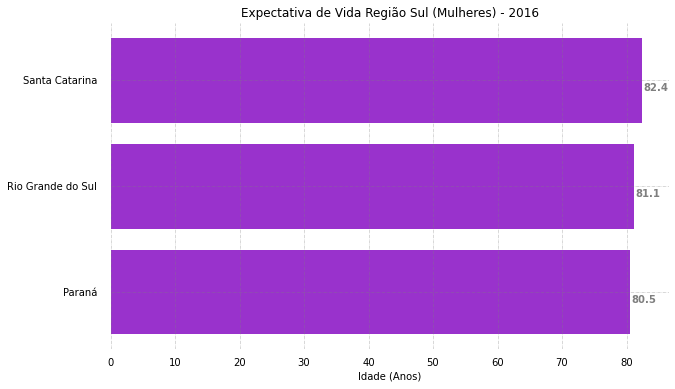

In [13]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(estados_sul, expec_m, color='darkorchid')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Expectativa de Vida Região Sul (Mulheres) - 2016',
             loc ='center')
plt.xlabel('Idade (Anos)')
plt.show()

# Região Norte

In [14]:
dados_exp[dados_exp['REGIAO']=='Norte']

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,REGIAO
1,3,Unidade da Federação,1622,Anos,71.3,11,Rondônia,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Norte
2,3,Unidade da Federação,1622,Anos,68.3,11,Rondônia,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Norte
3,3,Unidade da Federação,1622,Anos,75.0,11,Rondônia,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Norte
4,3,Unidade da Federação,1622,Anos,73.9,12,Acre,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Norte
5,3,Unidade da Federação,1622,Anos,70.7,12,Acre,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Norte
6,3,Unidade da Federação,1622,Anos,77.5,12,Acre,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Norte
7,3,Unidade da Federação,1622,Anos,71.9,13,Amazonas,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Norte
8,3,Unidade da Federação,1622,Anos,68.6,13,Amazonas,2503,Esperança de vida ao nascer,4,Homens,2016,2016,Norte
9,3,Unidade da Federação,1622,Anos,75.5,13,Amazonas,2503,Esperança de vida ao nascer,5,Mulheres,2016,2016,Norte
10,3,Unidade da Federação,1622,Anos,71.5,14,Roraima,2503,Esperança de vida ao nascer,6794,Total,2016,2016,Norte


In [15]:
estados_norte=['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins']
expec_h=[68.3,70.7,68.6,69.1,68.4,71.3,70.5]
expec_m=[75,77.5,75.5,74.3,76.3,76.7,76.7]
expec_h.sort(reverse=True)
expec_m.sort(reverse=True)

In [16]:
estados_norte_h=['Amapá','Acre','Tocantins','Roraima','Amazonas','Pará','Rondônia']
expec_h

[71.3, 70.7, 70.5, 69.1, 68.6, 68.4, 68.3]

In [17]:
estados_norte_m=['Acre','Amapá','Tocantins','Pará','Amazonas','Rondônia','Roraima']
expec_m

[77.5, 76.7, 76.7, 76.3, 75.5, 75, 74.3]

## Homens

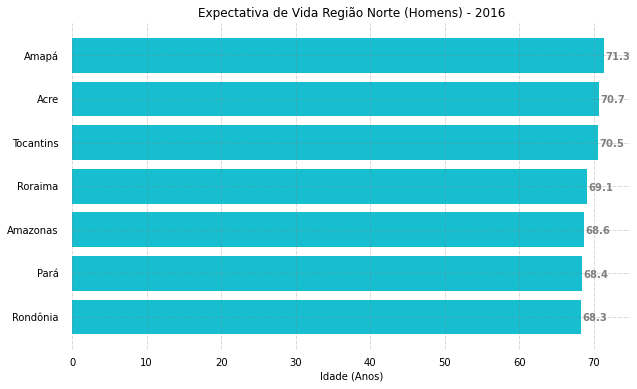

In [18]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(estados_norte_h, expec_h, color='tab:cyan')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Expectativa de Vida Região Norte (Homens) - 2016',
             loc ='center')
plt.xlabel('Idade (Anos)')
plt.show()

## Mulheres

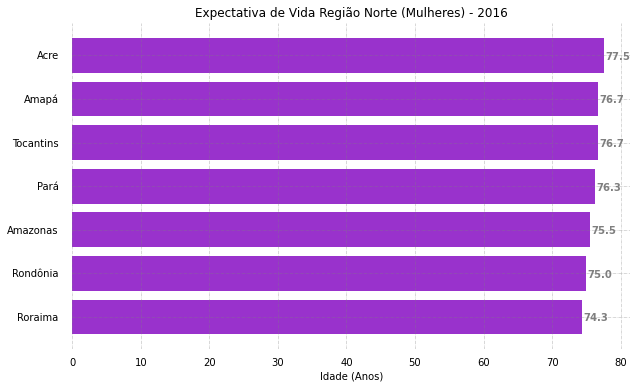

In [19]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.barh(estados_norte_m, expec_m, color='darkorchid')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='tab:gray')
ax.set_title('Expectativa de Vida Região Norte (Mulheres) - 2016',
             loc ='center')
plt.xlabel('Idade (Anos)')
plt.show()